In [1]:
import pandas as pd

df0 = pd.read_csv("results_O0.csv")   # columns: U,ms,sum
df2 = pd.read_csv("results_O2.csv")

best0 = df0.loc[df0["ms"].idxmin()]
best2 = df2.loc[df2["ms"].idxmin()]

print("Best -O0:", int(best0["U"]), "time(ms)=", float(best0["ms"]))
print("Best -O2:", int(best2["U"]), "time(ms)=", float(best2["ms"]))


Best -O0: 24 time(ms)= 0.754045
Best -O2: 8 time(ms)= 0.37276


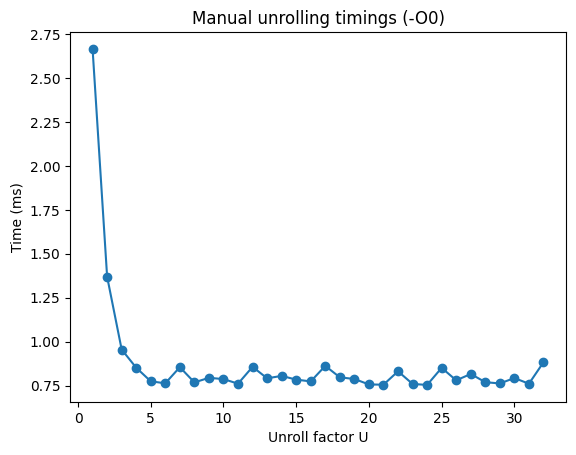

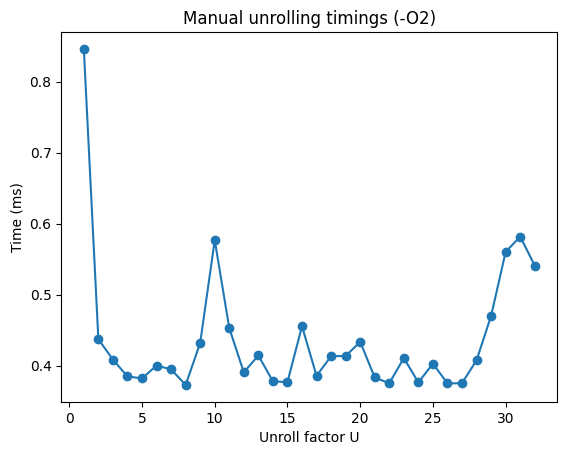

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df0["U"], df0["ms"], marker="o")
plt.xlabel("Unroll factor U")
plt.ylabel("Time (ms)")
plt.title("Manual unrolling timings (-O0)")
plt.show()

plt.figure()
plt.plot(df2["U"], df2["ms"], marker="o")
plt.xlabel("Unroll factor U")
plt.ylabel("Time (ms)")
plt.title("Manual unrolling timings (-O2)")
plt.show()


In [3]:
t0_u1 = float(df0.loc[df0["U"]==1, "ms"].iloc[0])
t2_u1 = float(df2.loc[df2["U"]==1, "ms"].iloc[0])

print("Speedup @ -O0 (best vs U=1):", t0_u1 / float(best0["ms"]))
print("Speedup @ -O2 (best vs U=1):", t2_u1 / float(best2["ms"]))


Speedup @ -O0 (best vs U=1): 3.5344508616859738
Speedup @ -O2 (best vs U=1): 2.269398540615946


In [3]:
BW_GBs = 20.0  # <-- put your sustained bandwidth in GB/s
BW = BW_GBs * 1e9  # bytes/s

def tmin_ms(n, bytes_per_elem, bw_bytes_s):
    return (n * bytes_per_elem / bw_bytes_s) * 1000.0

for name, b in [("double",8), ("float",4), ("int",4), ("short",2)]:
    print(name, "Tmin(ms)≈", tmin_ms(1_000_000, b, BW))


double Tmin(ms)≈ 0.4
float Tmin(ms)≈ 0.2
int Tmin(ms)≈ 0.2
short Tmin(ms)≈ 0.1
